In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('preparado_para_algoritmo.csv') 

In [3]:
data.head()

DENOMINACION_AF  \
0                FORMACION MODIFICACION DEL RCF   
1              INGLÉS TÉCNICO-MARÍTMO DE ESTIBA   
2  CAP FORMACION CONTINUA MERCANCIAS / VIAJEROS   
3         ALERGIAS E INTOLERANCIAS ALIMENTARIAS   
4                EXECUTIVE HOUSEKEEPING MANAGER   

                                 CODIGO_FP  \
0                 Formación complementaria   
1                 Formación complementaria   
2  Transporte y mantenimiento de vehículos   
3                  Industrias alimentarias   
4                     Hostelería y turismo   

                                        D_CONTENIDOS  \
0  establec oper restablec bloque telefon situaci...   
1  concept elemental gramat salud expresion socia...   
2  bloqu i conduccion racional bas norm segur con...   
3  tem alergi intoler alimentari alergi intoler c...   
4  modul i regiduri pis gobernant hotel hras modu...   

                                         D_OBJETIVOS  \
0  Dar a conocer el contenido más significativo d...   
1  - Difundir la lengua inglesa como herramienta ...   
2  Conocer las características de la cadena cinem...   
3  La creciente preocupación de la sociedad y de ...   
4  Dar toda la formación y habilidades necesarias...   

                        CODIGO_AREA_TRAD Languagereveiw  
0                      Competencia clave             es  
1                    Lenguas extranjeras             es  
2  Conducción de vehículos por carretera             es  
3                     Alimentos diversos             es  
4                            Alojamiento             pt

# Wordcloud para explorar las plabras que más aparecen en la descripción de contenidos y en los objetivos

In [4]:
from wordcloud import WordCloud
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

totalText=""
for words in data["D_CONTENIDOS"]:
    totalText += words

wc=WordCloud(background_color="black",max_font_size=50).generate(totalText)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")



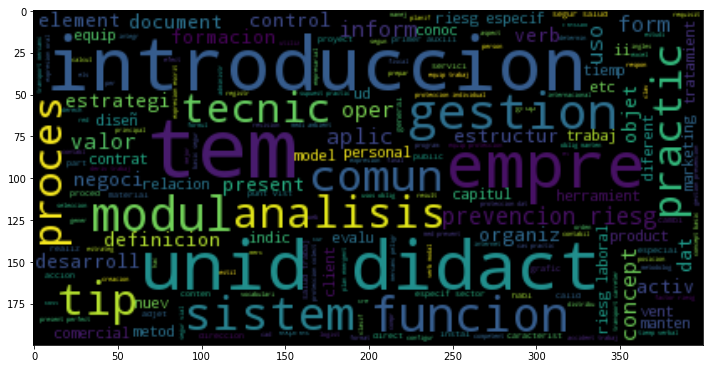

In [5]:
from wordcloud import WordCloud
pd.options.display.max_columns = None
import matplotlib.pyplot as plt

totalText=""
for words in data["D_CONTENIDOS"]:
    totalText += words

wc=WordCloud(background_color="black",max_font_size=50).generate(totalText)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")

Text(0.5, 1.0, 'Palabras más frecuentes')

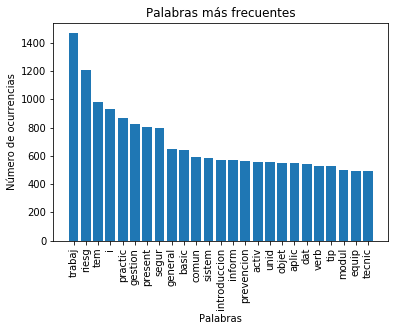

In [6]:
import nltk
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import ToktokTokenizer 

x=nltk.FreqDist(ToktokTokenizer().tokenize(totalText)).most_common(25)
words = [words[0] for words in x]
values = [values[1] for values in x]

plt.bar(words,values)
plt.xticks(rotation=90)
plt.xlabel("Palabras")
plt.ylabel("Número de ocurrencias")
plt.title("Palabras más frecuentes")

## La x que aparece será eliminada al aplicar CountVectorizer. Lo mismo sucederá con la i. El resto de palabras no tienen porqué coincidir con la baremación que haga el algoritmo TF-IDF.

## Limitación de palabras relevantes. LO pongo en 100 aunque podría bajar

In [7]:
import nltk

def preprocessing2(x):
    alo = nltk.FreqDist([word for word in x.split()]).most_common(100)
    return " ".join([ word[0] for word in alo])

In [8]:
data['DENOMINACION_AF']=data['DENOMINACION_AF'].apply(lambda x: str(x))

In [9]:
columns = ['DENOMINACION_AF','CODIGO_FP', 'D_CONTENIDOS', 'D_OBJETIVOS', 'CODIGO_AREA_TRAD']
for colum in columns: 
    data[colum]=data[colum].apply(preprocessing2)

In [10]:
s=data['D_CONTENIDOS'][2]
len(s.split())

100

In [11]:
for x in range(10):
    print('Ejemplo \n\n {}'.format(data['D_CONTENIDOS'][x]))

Ejemplo 

 via circul situacion temporal telefon banaliz restablec libr anormal respons prescripcion puntualiz establec telefonem coordin bloque consign bloqu degrad entreg oper
Ejemplo 

 buqu oper convers estib inicial comunic accesori carg nomenclatur dialog dentr situacion principal elemental aver esencial gramat flu manipul general expresion oralment r estibarn ingles part accident funcion desenvolv puert portuari realiz comun english trabaj vocabulari personal concept oficial mercanc social desestib salud bodeg etc cubiert util oficin
Ejemplo 

 accident segur utiliz cas conduccion trafic vial vehicul basic aplic transport fren i veloc bloqu principi norm ralentiz l reaccion r s dinam b d estres q fatig sector riesg comport f servici formacion conductor relacion h g reglament m alcohol conoc c consum grup consecuent k situacion socorr t p efect tacograf n j z caj advers transmision declar ii caus material seleccion optic individualiz mal actividadrep incendi adopt capac zon emerg

### Voy a probar primero a vectorizar (transformar strings a números) con la columna de contenido, que es la que más texto tiene. Luego probaré añadiendo columnas. 

### En principio vectorizo con TfidfVectorizer aunque otra forma de hacerlo es con Tfidftransformer.

### Al haber tanto texto cabe la posibilidad de tener que usar PCA (que por otro lado es muy parecido al LDA)

### Tengo mis dudas con la tokenización, stem y lemmatize de NLTK en castellano. Leer documentación recolectada al respecto. Hay otras opciones.

### Comprobar si he usado bigramas o ngrams.

### Comprobar que el stem  por defecto tuviera el snowball

### Tengo duddas con stop_words. Revisar cuando las hice o meterlas en Vectoricer. SUbir minimo de letras a 3.


# 1. Pruebo con la forma corta de TfidfVectorizer y acabo hecho un poco un lío porque parece que esta opción solo acepta un array y no un df (¿se puede?)

In [12]:
#prueba = pd.DataFrame(data['D_CONTENIDOS'])
prueba = data['D_CONTENIDOS']

In [13]:
prueba.shape

(1593,)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

tfidf_vectorizer=TfidfVectorizer()
 
# just send in all your docs here
fitted_vectorizer=tfidf_vectorizer.fit(prueba)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(prueba)

In [15]:
print(type(tfidf_vectorizer_vectors))
tfidf_vectorizer_vectors.shape

<class 'scipy.sparse.csr.csr_matrix'>


(1593, 9932)

In [16]:
aver_si_ahora = pd.DataFrame(tfidf_vectorizer.transform(prueba).todense(),columns=fitted_vectorizer.get_feature_names())


In [17]:
aver_si_ahora.head()

aa  aacc  aan  aansomeany  aanth   ab  aban  abandon  abap  abarc  \
0  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
1  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
2  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
3  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
4  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   

   abastec  abat  abb  abc  abdom  aber  abgeleitet  abiert  abintestat  \
0      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
1      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
2      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
3      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
4      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   

   abiot  abitudini  able  ablehn  abon  abord  abordaj  abort  about  abox  \
0    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
1    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
2    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
3    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
4    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   

   abp  abps  abras  abren  abrev  abreviatur  abril  abrir  abs  absolut  \
0  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
1  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
2  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
3  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
4  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   

   absorbent  absorcion  abstract  abus   ac  acab  acabats  academ  acadèmic  \
0        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
1        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
2        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
3        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
4        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   

   acantocefal  acar  acc  acced  accentu  accept  acceptingrefusing  acces  \
0          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
1          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
2          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
3          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
4          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   

   accesibil  accesoderech  accesodescens  accesori  accesosregistr  access  \
0        0.0           0.0            0.0   0.00000             0.0     0.0   
1        0.0           0.0            0.0   0.17875             0.0     0.0   
2        0.0           0.0            0.0   0.00000             0.0     0.0   
3        0.0           0.0            0.0   0.00000             0.0     0.0   
4        0.0           0.0            0.0   0.00000             0.0     0.0   

   accessoris  accident  accidental  accidents  accidetn  accion  accionarial  \
0         0.0  0.000000         0.0        0.0       0.0     0.0          0.0   
1         0.0  0.113949         0.0        0.0       0.0     0.0          0.0   
2         0.0  0.093603         0.0        0.0       0.0     0.0          0.0   
3         0.0  0.000000         0.0        0.0       0.0     0.0          0.0   
4         0.0  0.000000         0.0        0.0       0.0     0.0          0.0   

   accions  account  accuhal  aceit  aceler  acent  acentu  acept  aceptac  \
0      0.0      0.0      0.0    0.0     0.0    0.0     0.0    0.0      0.0   
1      0.0      0.0      0.0    0.0     0.0    0.0     0.0    0.0      0.0   
2      0.0      0.

for key, value in area_dict.items():
    if value > 0:
        print(key, value)

# Pruebo la forma larga con TfidefTRansformer

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer 

encode = data.loc[:,"D_CONTENIDOS"] #Todas las filas de esta columna
#type(encode)
cv= CountVectorizer().fit(encode)
count_vect = pd.DataFrame(cv.transform(encode).todense(),columns=cv.get_feature_names())
tfidfhead=TfidfTransformer().fit(count_vect)
transformed =pd.DataFrame(tfidfhead.transform(count_vect).todense(),columns=cv.get_feature_names())



In [19]:
transformed.shape

(1593, 9932)

In [20]:
transformed.head()

aa  aacc  aan  aansomeany  aanth   ab  aban  abandon  abap  abarc  \
0  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
1  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
2  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
3  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   
4  0.0   0.0  0.0         0.0    0.0  0.0   0.0      0.0   0.0    0.0   

   abastec  abat  abb  abc  abdom  aber  abgeleitet  abiert  abintestat  \
0      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
1      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
2      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
3      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   
4      0.0   0.0  0.0  0.0    0.0   0.0         0.0     0.0         0.0   

   abiot  abitudini  able  ablehn  abon  abord  abordaj  abort  about  abox  \
0    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
1    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
2    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
3    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   
4    0.0        0.0   0.0     0.0   0.0    0.0      0.0    0.0    0.0   0.0   

   abp  abps  abras  abren  abrev  abreviatur  abril  abrir  abs  absolut  \
0  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
1  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
2  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
3  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   
4  0.0   0.0    0.0    0.0    0.0         0.0    0.0    0.0  0.0      0.0   

   absorbent  absorcion  abstract  abus   ac  acab  acabats  academ  acadèmic  \
0        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
1        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
2        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
3        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   
4        0.0        0.0       0.0   0.0  0.0   0.0      0.0     0.0       0.0   

   acantocefal  acar  acc  acced  accentu  accept  acceptingrefusing  acces  \
0          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
1          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
2          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
3          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   
4          0.0   0.0  0.0    0.0      0.0     0.0                0.0    0.0   

   accesibil  accesoderech  accesodescens  accesori  accesosregistr  access  \
0        0.0           0.0            0.0   0.00000             0.0     0.0   
1        0.0           0.0            0.0   0.17875             0.0     0.0   
2        0.0           0.0            0.0   0.00000             0.0     0.0   
3        0.0           0.0            0.0   0.00000             0.0     0.0   
4        0.0           0.0            0.0   0.00000             0.0     0.0   

   accessoris  accident  accidental  accidents  accidetn  accion  accionarial  \
0         0.0  0.000000         0.0        0.0       0.0     0.0          0.0   
1         0.0  0.113949         0.0        0.0       0.0     0.0          0.0   
2         0.0  0.093603         0.0        0.0       0.0     0.0          0.0   
3         0.0  0.000000         0.0        0.0       0.0     0.0          0.0   
4         0.0  0.000000         0.0        0.0       0.0     0.0          0.0   

   accions  account  accuhal  aceit  aceler  acent  acentu  acept  aceptac  \
0      0.0      0.0      0.0    0.0     0.0    0.0     0.0    0.0      0.0   
1      0.0      0.0      0.0    0.0     0.0    0.0     0.0    0.0      0.0   
2      0.0      0.

# Silhouette Score y Sacar codo para elegir número de clusters

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


X = tfidf_vectorizer_vectors
#y = np.array(dataframe['categoria'])
X.shape


(1593, 9932)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#for n_cluster in range(2, 11):
    #kmeans = KMeans(n_clusters=n_cluster).fit(X)
    #label = kmeans.labels_
    #sil_coeff = silhouette_score(X, label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))




In [23]:
#for n_cluster in range(30,35):
    #kmeans = KMeans(n_clusters=n_cluster).fit(X)
    #label = kmeans.labels_
    #sil_coeff = silhouette_score(X, label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [24]:
#for n_cluster in range(60,61):
    #kmeans = KMeans(n_clusters=n_cluster).fit(X)
    #label = kmeans.labels_
    #sil_coeff = silhouette_score(X, label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [25]:
#for n_cluster in range(70,71):
    #kmeans = KMeans(n_clusters=n_cluster).fit(X)
    #label = kmeans.labels_
    #sil_coeff = silhouette_score(X, label, metric='euclidean')
    #print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [26]:
''''for n_cluster in range(50,51):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))'''

'\'for n_cluster in range(50,51):\n    kmeans = KMeans(n_clusters=n_cluster).fit(X)\n    label = kmeans.labels_\n    sil_coeff = silhouette_score(X, label, metric=\'euclidean\')\n    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))'

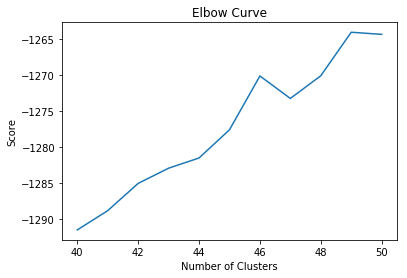

In [27]:
nc=range(40,51)
kmeans = [KMeans(n_clusters=i) for i in nc]
#kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### No sé muy bien cómo leer el score. Y, aunque se puede ver el codo, lo cierto es que aparece al revés...

# Clusterización

### 1. KMeans

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 47)
temp = kmeans.fit(transformed)
data['labels'] = temp.labels_

In [29]:
data.head()

DENOMINACION_AF  \
0                MODIFICACION FORMACION DEL RCF   
1              INGLÉS DE TÉCNICO-MARÍTMO ESTIBA   
2  MERCANCIAS / CAP CONTINUA FORMACION VIAJEROS   
3         E ALERGIAS ALIMENTARIAS INTOLERANCIAS   
4                HOUSEKEEPING MANAGER EXECUTIVE   

                                 CODIGO_FP  \
0                 complementaria Formación   
1                 complementaria Formación   
2  mantenimiento Transporte y de vehículos   
3                  alimentarias Industrias   
4                     Hostelería turismo y   

                                        D_CONTENIDOS  \
0  via circul situacion temporal telefon banaliz ...   
1  buqu oper convers estib inicial comunic acceso...   
2  accident segur utiliz cas conduccion trafic vi...   
3  alimentari alergi tem intoler alergen gestion ...   
4  hras modul pis tecnic ivtecn i prevencion gobe...   

                                         D_OBJETIVOS  \
0  de el a en los fin Circulación las conocer Fer...   
1  de como nivel la a técnico. convencional el im...   
2  de y el la Tener su los las Conocer conciencia...   
3  de la en el y a alérgenos con alimentaria indu...   
4  su para en necesarias las de gestionar Dar pod...   

                        CODIGO_AREA_TRAD Languagereveiw  labels  
0                      Competencia clave             es      15  
1                    Lenguas extranjeras             es      15  
2  por carretera Conducción vehículos de             es      28  
3                     Alimentos diversos             es       1  
4                            Alojamiento             pt      15

In [30]:
data['labels'].value_counts()

20    219
15    196
30     89
8      65
32     60
12     60
43     54
10     51
40     50
7      39
21     38
35     37
39     36
28     31
11     31
44     31
33     28
23     27
29     26
6      25
17     23
46     23
9      22
22     22
2      22
34     21
1      21
42     20
27     19
38     19
5      18
14     18
3      15
16     15
24     14
36     13
4      13
19     13
31     11
25      9
37      8
45      8
13      8
18      8
0       7
41      6
26      4
Name: labels, dtype: int64

In [31]:
prueba = data.loc[data['labels'] == 42] 
prueba.loc[20:30]


Empty DataFrame
Columns: [DENOMINACION_AF, CODIGO_FP, D_CONTENIDOS, D_OBJETIVOS, CODIGO_AREA_TRAD, Languagereveiw, labels]
Index: []

### 2. Agglomerative

In [32]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=40).fit(transformed)
data['labels_aggl'] = clustering.labels_

In [33]:
data.head()

DENOMINACION_AF  \
0                MODIFICACION FORMACION DEL RCF   
1              INGLÉS DE TÉCNICO-MARÍTMO ESTIBA   
2  MERCANCIAS / CAP CONTINUA FORMACION VIAJEROS   
3         E ALERGIAS ALIMENTARIAS INTOLERANCIAS   
4                HOUSEKEEPING MANAGER EXECUTIVE   

                                 CODIGO_FP  \
0                 complementaria Formación   
1                 complementaria Formación   
2  mantenimiento Transporte y de vehículos   
3                  alimentarias Industrias   
4                     Hostelería turismo y   

                                        D_CONTENIDOS  \
0  via circul situacion temporal telefon banaliz ...   
1  buqu oper convers estib inicial comunic acceso...   
2  accident segur utiliz cas conduccion trafic vi...   
3  alimentari alergi tem intoler alergen gestion ...   
4  hras modul pis tecnic ivtecn i prevencion gobe...   

                                         D_OBJETIVOS  \
0  de el a en los fin Circulación las conocer Fer...   
1  de como nivel la a técnico. convencional el im...   
2  de y el la Tener su los las Conocer conciencia...   
3  de la en el y a alérgenos con alimentaria indu...   
4  su para en necesarias las de gestionar Dar pod...   

                        CODIGO_AREA_TRAD Languagereveiw  labels  labels_aggl  
0                      Competencia clave             es      15            4  
1                    Lenguas extranjeras             es      15            5  
2  por carretera Conducción vehículos de             es      28           32  
3                     Alimentos diversos             es       1           10  
4                            Alojamiento             pt      15            4

In [34]:
data['labels_aggl'].value_counts()

4     526
6     169
5     112
7      91
12     84
1      71
0      51
3      46
38     39
19     31
9      28
10     28
14     27
11     22
24     21
2      17
31     17
26     14
23     14
17     13
29     13
21     13
27     13
18     12
37     12
33     10
30     10
25     10
16     10
32      9
20      7
22      7
13      7
8       7
39      7
35      6
15      6
28      5
34      4
36      4
Name: labels_aggl, dtype: int64

In [35]:
prueba2 = data.loc[data['labels_aggl'] == 2].reset_index()
prueba2

index                        DENOMINACION_AF                 CODIGO_FP  \
0      86  ADVANCED AL PREPARACIÓN C1) II (NIVEL  complementaria Formación   
1     309               LENGUA DE FRANCESA CURSO  complementaria Formación   
2     329     B2) AL PREPARACIÓN FIRST II (NIVEL  complementaria Formación   
3    1065               ALEMÁN B1 DE NIVEL CURSO  complementaria Formación   
4    1106                  ALEMÁN B2 NIVEL CURSO  complementaria Formación   
5    1193                1 ADVANCED INGLES CURSO  complementaria Formación   
6    1253                        INGLÉS ADVANCED  complementaria Formación   
7    1381                              INGLÉS A2  complementaria Formación   
8    1384                             INGLÉS FCE  complementaria Formación   
9    1385                             INGLÉS CAE  complementaria Formación   
10   1386                     INGLÉS B2 SPEAKING  complementaria Formación   
11   1399                    INGLÉS SPEAKING FCE  complementaria Formación   
12   1400                     INGLÉS C1 SPEAKING  complementaria Formación   
13   1403                             FRANCÉS A1  complementaria Formación   
14   1406                             FRANCÉS A2  complementaria Formación   
15   1424                    INGLÉS - ADVANCED 2  complementaria Formación   
16   1428                    INGLÉS 1 - ADVANCED  complementaria Formación   

                                         D_CONTENIDOS  \
0   comprension expresion cinc part oral escrit us...   
1   expresion destrez escrit oral form verbal comp...   
2   expresion comprension escrit oral audit lengu ...   
3      expresion comprension escrit lector audit oral   
4   expresion comprension uso lector audit lengu e...   
5   expresion comprension uso lector audit lengu e...   
6   expresion comprension escrit oral audit lengu ...   
7   referent europe lengu nivel marc comun adecu o...   
8   univers nivel cambridg adecu fce oral ejercici...   
9   univers cae nivel cambridg adecu oral ejercici...   
10  referent europe lengu nivel marc comun adecu b...   
11  fce univers nivel cambridg adecu oral ejercici...   
12  referent europe c lengu nivel marc comun adecu...   
13  referent europe lengu nivel marc comun adecu o...   
14  referent europe lengu nivel marc comun adecu o...   
15  expresion comprension escrit oral audit lengu ...   
16  expresion comprension escrit oral audit lengu ...   

                                          D_OBJETIVOS     CODIGO_AREA_TRAD  \
0   de y para temas textos uso relacionar o capaz ...  Lenguas extranjeras   
1      francesa. la expresión lengua y de Comprensión  Lenguas extranjeras   
2   Expresión de del Comprensión las lengua Uso la...  Lenguas extranjeras   
3    o de y sobre limitaciones el Ser temas aunqu...  Lenguas extranjeras   
4   de -Ser textos con capaz detallados diversos l...  Lenguas extranjeras   
5   y de  una en con sobre expresando argumentos....  Lenguas extranjeras   
6   el de con grupo vocabulario expresión comprens...  Lenguas extranjeras   
7   y de muy Ser sencillos la por capaz a breves l...  Lenguas extranjeras   
8   de y que en los la Comprender un o con las una...  Lenguas extranjeras   
9   y con de Comprender las no complejos sin se ot...  Lenguas extranjeras   
10  de y en la las Comprender los un que con tema ...  Lenguas extranjeras   
11  de y en la las Comprender los un que con tema ...  Lenguas extranjeras   
12  y con de las Comprender no complejos sin se qu...  Lenguas extranjeras   
13  y que a se la de ejemplo muy en por palabras c...  Lenguas extranjeras   
14  y de muy Ser sencillos la por capaz a breves l...  Lenguas extranjeras   
15  el de con grupo vocabulario expresión comprens...  Lenguas extranjeras   
16  el de con grupo vocabulario expresión comprens...  Lenguas extranjeras   

   Languagereveiw  labels  labels_aggl  
0              es      25            2  
1              es      22            2  
2              es      22            2  
3  

In [36]:
prueba2.shape

(17, 9)

In [37]:
prueba2.head()

index                        DENOMINACION_AF                 CODIGO_FP  \
0     86  ADVANCED AL PREPARACIÓN C1) II (NIVEL  complementaria Formación   
1    309               LENGUA DE FRANCESA CURSO  complementaria Formación   
2    329     B2) AL PREPARACIÓN FIRST II (NIVEL  complementaria Formación   
3   1065               ALEMÁN B1 DE NIVEL CURSO  complementaria Formación   
4   1106                  ALEMÁN B2 NIVEL CURSO  complementaria Formación   

                                        D_CONTENIDOS  \
0  comprension expresion cinc part oral escrit us...   
1  expresion destrez escrit oral form verbal comp...   
2  expresion comprension escrit oral audit lengu ...   
3     expresion comprension escrit lector audit oral   
4  expresion comprension uso lector audit lengu e...   

                                         D_OBJETIVOS     CODIGO_AREA_TRAD  \
0  de y para temas textos uso relacionar o capaz ...  Lenguas extranjeras   
1     francesa. la expresión lengua y de Comprensión  Lenguas extranjeras   
2  Expresión de del Comprensión las lengua Uso la...  Lenguas extranjeras   
3   o de y sobre limitaciones el Ser temas aunqu...  Lenguas extranjeras   
4  de -Ser textos con capaz detallados diversos l...  Lenguas extranjeras   

  Languagereveiw  labels  labels_aggl  
0             es      25            2  
1             es      22            2  
2             es      22            2  
3             es      22            2  
4             es      22            2

In [38]:
#for b in range(20,30):
    #print('\nEjemplo \n\n {}'.format(prueba2['D_CONTENIDOS'][b]))




### Pruebo DBSCAN

In [39]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5)
temp_dbscan = dbscan.fit(transformed)
data['labels_DBSCAN'] = temp_dbscan.labels_

In [40]:
data['labels_DBSCAN'].value_counts()

-1     1494
 11      17
 8       14
 10      13
 1        8
 0        8
 9        6
 5        6
 4        6
 2        6
 7        5
 6        5
 3        5
Name: labels_DBSCAN, dtype: int64

### Probar LDA

In [41]:
''''import gensim
from gensim.utils import simple_preprocess

lda_model_tfidf = gensim.models.LdaMulticore(transformed, num_topics=50, passes=2)'''

"'import gensim\nfrom gensim.utils import simple_preprocess\n\nlda_model_tfidf = gensim.models.LdaMulticore(transformed, num_topics=50, passes=2)"

### PCA sobre Transformed

In [42]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
entreno = pca.fit_transform(transformed)  


entreno.shape


(1593, 20)

In [43]:
type(entreno)

numpy.ndarray

### Modelos de predicción (aunque KMeans también puede hacerlo)

In [44]:
para_prediccion = pd.DataFrame(data=entreno,
          index=np.array(range(0, 1593)),
          columns=np.array(range(0, 20)))

In [45]:
para_prediccion.head()

0         1         2         3         4         5         6   \
0 -0.010839 -0.054468 -0.045219  0.027904  0.004178  0.014831  0.027975   
1  0.021419  0.054545  0.024494  0.050154 -0.010105  0.026295  0.095038   
2 -0.183194  0.108344  0.022234 -0.027682 -0.090615 -0.234042  0.249747   
3 -0.187664  0.074293  0.027456 -0.008034  0.031899  0.007388 -0.054129   
4 -0.064482 -0.034150 -0.034454  0.015236  0.026857  0.032034  0.042911   

         7         8         9         10        11        12        13  \
0  0.020720  0.001589 -0.044038 -0.008016  0.023595  0.019732  0.020299   
1 -0.010750 -0.019918  0.008337 -0.023811 -0.019816  0.033519  0.009484   
2  0.327930 -0.082440  0.054169 -0.018806  0.041407 -0.035618  0.095068   
3 -0.089500  0.059327 -0.024967 -0.006777 -0.099716 -0.199648  0.246057   
4 -0.019455  0.033457 -0.047576 -0.018919 -0.012333 -0.030574 -0.049313   

         14        15        16        17        18        19  
0  0.036435  0.013404 -0.001830 -0.001894 -0.007802  0.015702  
1  0.026311 -0.020406 -0.002193  0.028673 -0.068564 -0.004727  
2  0.089690 -0.026049  0.000724  0.098367  0.035648 -0.008599  
3  0.319427  0.065042 -0.026644 -0.130788  0.072236 -0.147840  
4  0.031063 -0.001545  0.046860 -0.018278 -0.023158  0.020656

In [46]:
para_prediccion['clusters'] = data['labels']

In [47]:
para_prediccion.head()

0         1         2         3         4         5         6  \
0 -0.010839 -0.054468 -0.045219  0.027904  0.004178  0.014831  0.027975   
1  0.021419  0.054545  0.024494  0.050154 -0.010105  0.026295  0.095038   
2 -0.183194  0.108344  0.022234 -0.027682 -0.090615 -0.234042  0.249747   
3 -0.187664  0.074293  0.027456 -0.008034  0.031899  0.007388 -0.054129   
4 -0.064482 -0.034150 -0.034454  0.015236  0.026857  0.032034  0.042911   

          7         8         9        10        11        12        13  \
0  0.020720  0.001589 -0.044038 -0.008016  0.023595  0.019732  0.020299   
1 -0.010750 -0.019918  0.008337 -0.023811 -0.019816  0.033519  0.009484   
2  0.327930 -0.082440  0.054169 -0.018806  0.041407 -0.035618  0.095068   
3 -0.089500  0.059327 -0.024967 -0.006777 -0.099716 -0.199648  0.246057   
4 -0.019455  0.033457 -0.047576 -0.018919 -0.012333 -0.030574 -0.049313   

         14        15        16        17        18        19  clusters  
0  0.036435  0.013404 -0.001830 -0.001894 -0.007802  0.015702        15  
1  0.026311 -0.020406 -0.002193  0.028673 -0.068564 -0.004727        15  
2  0.089690 -0.026049  0.000724  0.098367  0.035648 -0.008599        28  
3  0.319427  0.065042 -0.026644 -0.130788  0.072236 -0.147840         1  
4  0.031063 -0.001545  0.046860 -0.018278 -0.023158  0.020656        15

In [48]:
para_prediccion.to_csv('para_prediccion.csv',index=False)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X= para_prediccion.drop(axis=1, labels=["clusters"])
y= para_prediccion.clusters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

lr = LogisticRegression(solver ='liblinear',max_iter=500)
clf = svm.SVC(gamma='auto', probability=True)
rforest = RandomForestClassifier(n_estimators=10)

lr.fit(X_train, y_train)
clf.fit(X_train, y_train) 
rforest.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred1 = clf.predict(X_test)
y_pred2 = rforest.predict(X_test)
print("Accuracy LG:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy LG:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred2))

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [49]:
'rfc1.fit(X_train, y_train)'

'rfc1.fit(X_train, y_train)'

In [50]:
'pred=rfc1.predict(X_test)''

SyntaxError: EOL while scanning string literal (<ipython-input-50-1af997302998>, line 1)

In [ ]:
'print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))'

In [ ]:
'from sklearn.ensemble import GradientBoostingClassifier'

In [ ]:
''''gr_boosted = GradientBoostingClassifier()
gr_boosted.fit(X_train, y_train)
score_booster = gr_boosted.score(X_test, y_test)
print(score_booster)'''